In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
np.random.seed(5)

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)

In [2]:
# import the data

train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
vd = pd.read_csv('VariableDescription.csv')
submit = pd.read_csv('sample_submission.csv')

In [3]:
train.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [4]:
test.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
5,H10545,2012,1.000000,0,V,V,V,U,3225.0,2,1988.0,.,4070
6,H8962,2015,0.986301,0,N,V,V,U,31.0,2,NaN,.,4070
7,H1015,2013,1.000000,0,V,V,V,U,1400.0,2,1980.0,.,4088
8,H9710,2012,1.000000,0,V,V,V,U,1300.0,2,NaN,.,4094
9,H9029,2012,1.000000,0,N,V,V,U,1200.0,2,NaN,.,4205


In [5]:
vd.head(50)

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,"duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5"
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-Not Painted)"
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not Fenced)"
6,Garden,building has garden or not (V-has garden; O-no garden)
7,Settlement,Area where the building is located. (R- rural area; U- urban area)
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [6]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [9]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer Id  3068 non-null   object
 1   Claim        3068 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.1+ KB


In [10]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [11]:
# a = train[train['Claim']==0].copy()
# b = train[train['Claim']==1].copy()

# a[[
 
#        'Building Dimension', 'Building_Type',
#  'Geo_Code']].duplicated().sum()

In [12]:
# a.drop_duplicates(subset=[

#        'Building Dimension', 'Building_Type',
# 'Geo_Code'], inplace=True)

In [13]:
# Check for duplicates

# train.duplicated(subset=['Insured_Period', 'Residential',
#        'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
#        'Building Dimension', 'Building_Type',
#        'Geo_Code', 'Claim']).sum()

train.duplicated(subset=['Insured_Period', 'NumberOfWindows',
       'Building Dimension', 'Building_Type',
        'Claim']).sum()

1790

In [14]:
train[train.duplicated(subset=['Insured_Period', 'NumberOfWindows',
       'Building Dimension', 'Building_Type',
        'Claim'])]['Claim'].value_counts()

0    1582
1     208
Name: Claim, dtype: int64

In [15]:
# First round of dropping

# train.drop_duplicates(subset=['Insured_Period', 'Residential',
#        'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
#        'Building Dimension', 'Building_Type',
#        'Geo_Code', 'Claim'], inplace=True, keep='last')

train.drop_duplicates(subset=['Insured_Period', 'NumberOfWindows',
       'Building Dimension', 'Building_Type',
        'Claim'], inplace=True, keep='last')

In [16]:
train['Claim'].value_counts()

0    3944
1    1426
Name: Claim, dtype: int64

In [17]:
# Reformating the data

def change(x):
    if x == "V":
        return 1
    elif x == 'N':
        return 0
    else:
        return -1
    
def nw(x):
    if x == '1':
        return 1
    elif x == '2':
        return 2
    else:
        return 3

def gc(x):
    try:
        num = int(x)
    except:
        return -1

    else:
        return int(x)

train['Building_Painted'] = train['Building_Painted'].apply(lambda x: 1 if x == 'N' else 0)
train['Building_Fenced'] = train['Building_Fenced'].apply(lambda x: 1 if x == 'N' else 0)
train['Garden'] = train['Garden'].apply(change)
train['Settlement'] = train['Settlement'].apply(lambda x: 1 if x == 'R' else 0)
train['NumberOfWindows'] = train['NumberOfWindows'].apply(nw)
train['NumberOfWindows'] = train['NumberOfWindows'].astype('int8')
train['Geo_Code'] = train['Geo_Code'].apply(gc)
train['Geo_Code'] = train['Geo_Code'].astype('int32')

test['Building_Painted'] = test['Building_Painted'].apply(lambda x: 1 if x == 'N' else 0)
test['Building_Fenced'] = test['Building_Fenced'].apply(lambda x: 1 if x == 'N' else 0)
test['Garden'] = test['Garden'].apply(change)
test['Settlement'] = test['Settlement'].apply(lambda x: 1 if x == 'R' else 0)
test['NumberOfWindows'] = test['NumberOfWindows'].apply(nw)
test['NumberOfWindows'] = test['NumberOfWindows'].astype('int8')
test['Geo_Code'] = test['Geo_Code'].apply(gc)
test['Geo_Code'] = test['Geo_Code'].astype('int32')

In [18]:
# Adding new columns
train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(-1)
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(-1)

train['All_yes'] = train['Building_Painted'] + train['Building_Fenced'] + train['Garden']
train['time_passed'] = train['YearOfObservation'] - train['Date_of_Occupancy']
test['All_yes'] = test['Building_Painted'] + test['Building_Fenced'] + test['Garden']
test['time_passed'] = test['YearOfObservation'] - test['Date_of_Occupancy']

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 0 to 7159
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5370 non-null   object 
 1   YearOfObservation   5370 non-null   int64  
 2   Insured_Period      5370 non-null   float64
 3   Residential         5370 non-null   int64  
 4   Building_Painted    5370 non-null   int64  
 5   Building_Fenced     5370 non-null   int64  
 6   Garden              5370 non-null   int64  
 7   Settlement          5370 non-null   int64  
 8   Building Dimension  5334 non-null   float64
 9   Building_Type       5370 non-null   int64  
 10  Date_of_Occupancy   5370 non-null   float64
 11  NumberOfWindows     5370 non-null   int8   
 12  Geo_Code            5370 non-null   int32  
 13  Claim               5370 non-null   int64  
 14  All_yes             5370 non-null   int64  
 15  time_passed         5370 non-null   float64
dtypes: flo

In [20]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,All_yes,time_passed
0,H14663,2013,1.0,0,1,0,1,0,290.0,1,1960.0,3,1053,0,2,53.0
1,H2037,2015,1.0,0,0,1,-1,1,490.0,1,1850.0,3,1053,0,0,165.0
2,H3802,2014,1.0,0,1,0,1,0,595.0,1,1960.0,3,1053,0,2,54.0
3,H3834,2013,1.0,0,0,0,1,0,2840.0,1,1960.0,3,1053,0,1,53.0
5,H4977,2012,1.0,0,0,1,-1,1,535.0,1,1980.0,3,1143,0,0,32.0


## Check investigating the data points claim categories

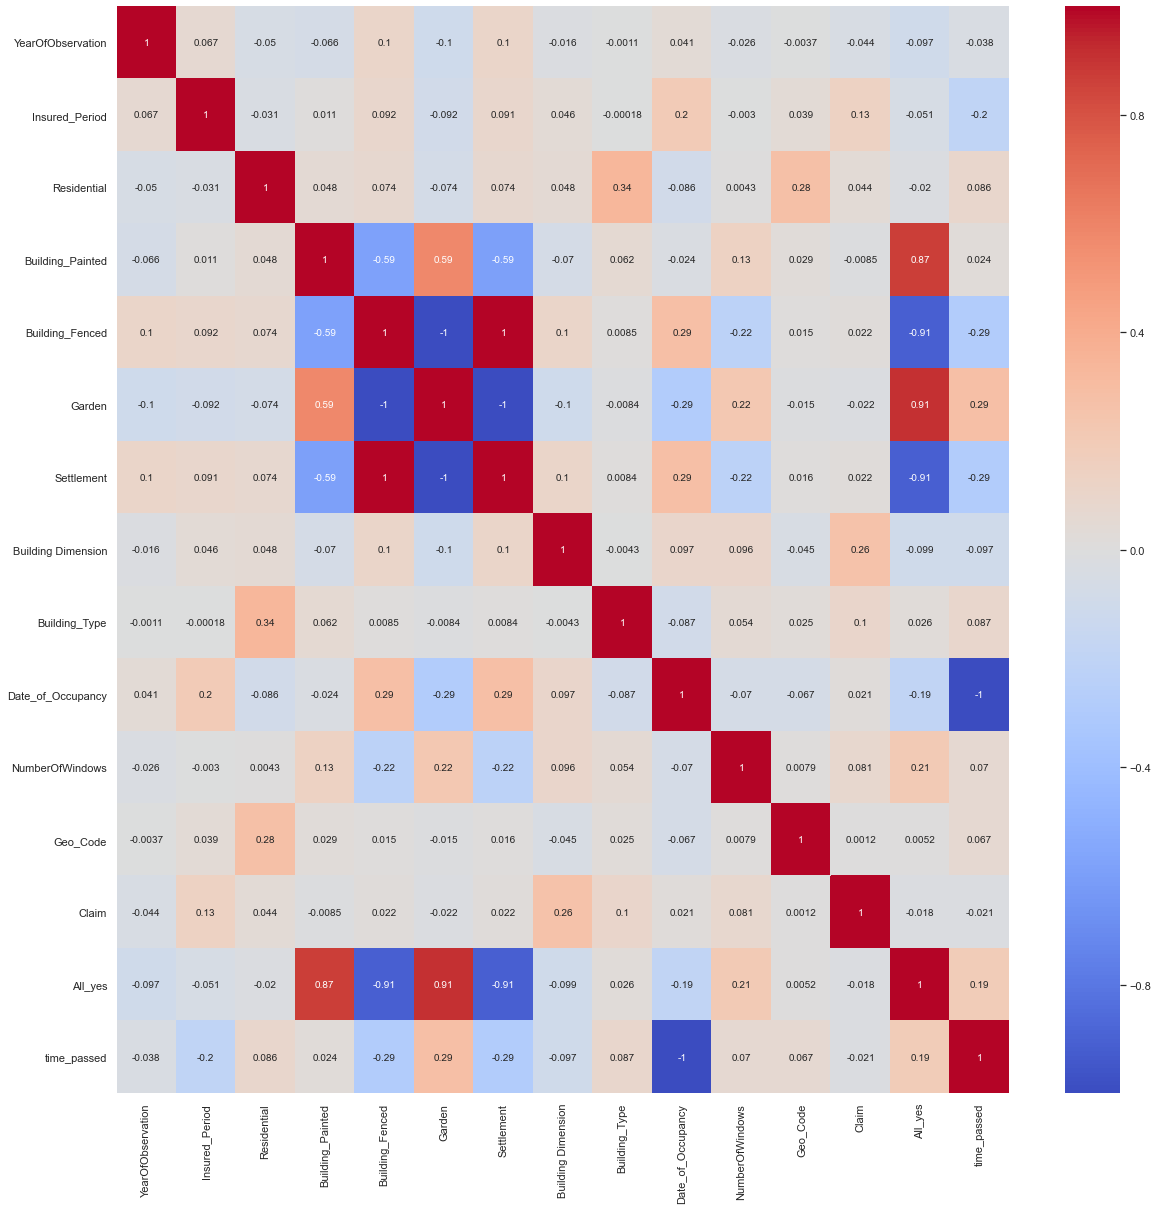

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [22]:
train['Claim'].value_counts()

0    3944
1    1426
Name: Claim, dtype: int64

In [23]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,All_yes,time_passed
count,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5334.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000
mean,2013.803724,0.883412,0.325326,0.219739,0.554376,-0.109125,0.554749,2117.249719,2.213594,1831.950466,2.922533,52171.100931,0.265549,0.664991,181.853259
std,1.407158,0.265111,0.468540,0.414109,0.497081,0.994121,0.497040,2466.087722,0.972332,494.834419,0.308740,30482.635004,0.441666,0.812493,494.779113
min,2012.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,2013.000000,0.997268,0.000000,0.000000,0.000000,-1.000000,0.000000,600.000000,2.000000,1954.000000,3.000000,21725.250000,0.000000,0.000000,32.000000
50%,2014.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,1254.500000,2.000000,1965.000000,3.000000,62108.000000,0.000000,0.000000,49.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2700.000000,3.000000,1980.000000,3.000000,77169.000000,1.000000,1.000000,60.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,3.000000,95607.000000,1.000000,2.000000,2017.000000


### Claim = 1

In [24]:
train[train['Claim']==1].describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,All_yes,time_passed
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1420.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.0,1426.000000,1426.000000
mean,2013.701262,0.942816,0.359748,0.213885,0.572230,-0.145863,0.572931,3195.814789,2.375877,1848.882889,2.964236,52231.122020,1.0,0.640252,164.818373
std,1.370552,0.185491,0.480095,0.410190,0.494929,0.989652,0.494826,3266.816537,1.001939,466.992323,0.210557,31001.025405,0.0,0.811518,466.969728
min,2012.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,100.000000,1.000000,-1.000000,1.000000,-1.000000,1.0,-1.000000,1.000000
25%,2013.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,977.750000,2.000000,1960.000000,3.000000,21231.000000,1.0,0.000000,32.000000
50%,2014.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,2098.000000,2.000000,1970.000000,3.000000,62176.500000,1.0,0.000000,44.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4200.000000,3.000000,1980.000000,3.000000,77056.750000,1.0,1.000000,56.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2014.000000,3.000000,95598.000000,1.0,2.000000,2017.000000


In [25]:
train.duplicated().sum()

0

In [26]:
train.corr()['Claim'].sort_values()

YearOfObservation    -0.043788
Garden               -0.022223
time_passed          -0.020704
All_yes              -0.018310
Building_Painted     -0.008501
Geo_Code              0.001184
Date_of_Occupancy     0.020577
Building_Fenced       0.021599
Settlement            0.021999
Residential           0.044179
NumberOfWindows       0.081228
Building_Type         0.100367
Insured_Period        0.134748
Building Dimension    0.263459
Claim                 1.000000
Name: Claim, dtype: float64

In [27]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'All_yes', 'time_passed'],
      dtype='object')

In [28]:
# a = train[train['Claim']==0].copy()
# b = train[train['Claim']==1].copy()

# a[[
#        'Building_Painted', 
#        'Building Dimension', 'Building_Type',
#        'NumberOfWindows', 'Geo_Code']].duplicated().sum()

In [29]:
# a.drop_duplicates(subset=[
#        'Building_Painted', 
#        'Building Dimension', 'Building_Type',
#        'NumberOfWindows', 'Geo_Code'], inplace=True)

In [30]:
# Check for duplication accross all Columns

train[['Residential', 'Settlement', 'Building Dimension', 'YearOfObservation',
       'Geo_Code', 'Building_Painted']].duplicated().sum()

38

In [31]:
train[train[['Residential', 'Settlement', 'Building Dimension', 'YearOfObservation',
       'Geo_Code', 'Building_Painted' ]].duplicated()]['Claim'].value_counts()

0    30
1     8
Name: Claim, dtype: int64

In [32]:
train.drop_duplicates(subset= ['Residential', 'Settlement', 'Building Dimension', 'YearOfObservation', 
       'Geo_Code', 'Building_Painted'], inplace=True, keep='last')

In [33]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'All_yes', 'time_passed'],
      dtype='object')

In [34]:
train['Claim'].value_counts()

0    3913
1    1419
Name: Claim, dtype: int64

In [35]:
a = train[train['Claim']==0].copy()
b = train[train['Claim']==1].copy()

a[[
       'Building_Painted', 'Building_Fenced',
        'Building Dimension',
        'Geo_Code']].duplicated().sum()

245

In [36]:
a.drop_duplicates(subset=[
       'Building_Painted', 'Building_Fenced',
       'Building Dimension', 
        'Geo_Code'], inplace=True)

# a.drop_duplicates(subset=[

#        'Building Dimension', 'Building_Type',
# 'Geo_Code'], inplace=True)

In [37]:
train = a.append(b)

train['Claim'].value_counts()

0    3668
1    1419
Name: Claim, dtype: int64

In [38]:
train['Claim'].value_counts()

0    3668
1    1419
Name: Claim, dtype: int64

In [39]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'All_yes', 'time_passed'],
      dtype='object')

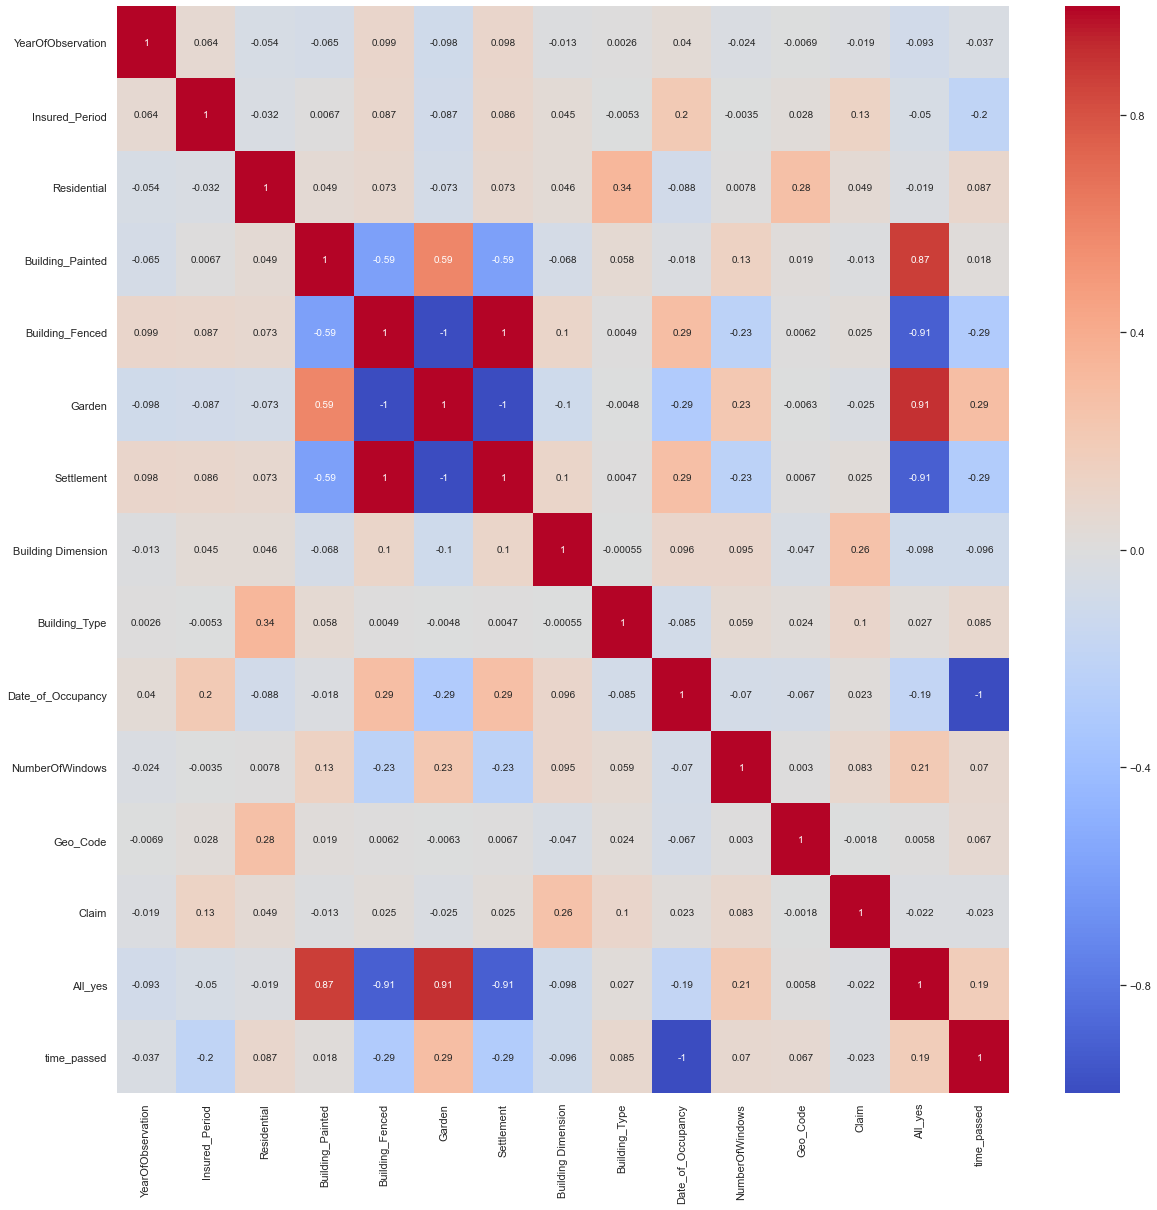

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [41]:
train.corr()['Claim'].sort_values()

Garden               -0.025363
time_passed          -0.022677
All_yes              -0.022373
YearOfObservation    -0.019263
Building_Painted     -0.012796
Geo_Code             -0.001777
Date_of_Occupancy     0.022621
Building_Fenced       0.024726
Settlement            0.025118
Residential           0.048982
NumberOfWindows       0.083124
Building_Type         0.100648
Insured_Period        0.131450
Building Dimension    0.264734
Claim                 1.000000
Name: Claim, dtype: float64

In [42]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'All_yes', 'time_passed'],
      dtype='object')

In [43]:
# Drop non useful columns
train.drop(['Customer Id', 'Settlement', 'Residential', 'YearOfObservation', 
       'Building_Painted', 'Building_Fenced', 'Garden', 'Date_of_Occupancy', 'time_passed', 'All_yes'], axis=1, inplace=True)
test.drop(['Customer Id', 'Settlement', 'Residential', 'YearOfObservation', 
       'Building_Painted', 'Building_Fenced', 'Garden', 'Date_of_Occupancy', 'time_passed', 'All_yes'], axis=1, inplace=True)

In [44]:
# check for missing values

train.isna().sum()

Insured_Period        0
Building Dimension    5
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [45]:
test.isna().sum()

Insured_Period         0
Building Dimension    13
Building_Type          0
NumberOfWindows        0
Geo_Code               0
dtype: int64

In [46]:
train.describe()

,Insured_Period,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5087.000000,5082.000000,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.887263,2134.622393,2.218203,2.923137,52495.446825,0.278946
std,0.262613,2490.482110,0.972872,0.306229,30293.893341,0.448525
min,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,0.997268,600.000000,2.000000,3.000000,25361.500000,0.000000
50%,1.000000,1263.000000,2.000000,3.000000,62160.000000,0.000000
75%,1.000000,2700.000000,3.000000,3.000000,77184.500000,1.000000
max,1.000000,20940.000000,4.000000,3.000000,95607.000000,1.000000


In [47]:
train[train['Claim']==1].describe()

,Insured_Period,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,1419.000000,1417.000000,1419.000000,1419.000000,1419.000000,1419.0
mean,0.942758,3194.858857,2.375617,2.964059,52408.904863,1.0
std,0.185881,3268.709313,1.002394,0.211061,30913.567722,0.0
min,0.000000,100.000000,1.000000,1.000000,-1.000000,1.0
25%,1.000000,978.000000,2.000000,3.000000,21231.000000,1.0
50%,1.000000,2096.000000,2.000000,3.000000,62201.000000,1.0
75%,1.000000,4200.000000,3.000000,3.000000,77147.000000,1.0
max,1.000000,20940.000000,4.000000,3.000000,95598.000000,1.0


In [48]:
train['Claim'].value_counts()

0    3668
1    1419
Name: Claim, dtype: int64

In [49]:
# fill missing values

train.fillna(-1, inplace=True, axis=1)
test.fillna(-1, inplace=True, axis=1)

In [50]:
# train.drop('Customer Id', inplace=True, axis=1)
# test.drop('Customer Id', inplace=True, axis=1)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 7156
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      5087 non-null   float64
 1   Building Dimension  5087 non-null   float64
 2   Building_Type       5087 non-null   int64  
 3   NumberOfWindows     5087 non-null   int8   
 4   Geo_Code            5087 non-null   int32  
 5   Claim               5087 non-null   int64  
dtypes: float64(2), int32(1), int64(2), int8(1)
memory usage: 223.5 KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      3069 non-null   float64
 1   Building Dimension  3069 non-null   float64
 2   Building_Type       3069 non-null   int64  
 3   NumberOfWindows     3069 non-null   int8   
 4   Geo_Code            3069 non-null   int32  
dtypes: float64(2), int32(1), int64(1), int8(1)
memory usage: 87.0 KB


In [53]:
# # fix number of windows

# def fix(x):
#     if x == '>=10':
#         return 10
#     elif x == '   .':
#         return -1
#     else:
#         return int(x)
    
# train['NumberOfWindows'] = train['NumberOfWindows'].apply(fix)
# test['NumberOfWindows'] = test['NumberOfWindows'].apply(fix)

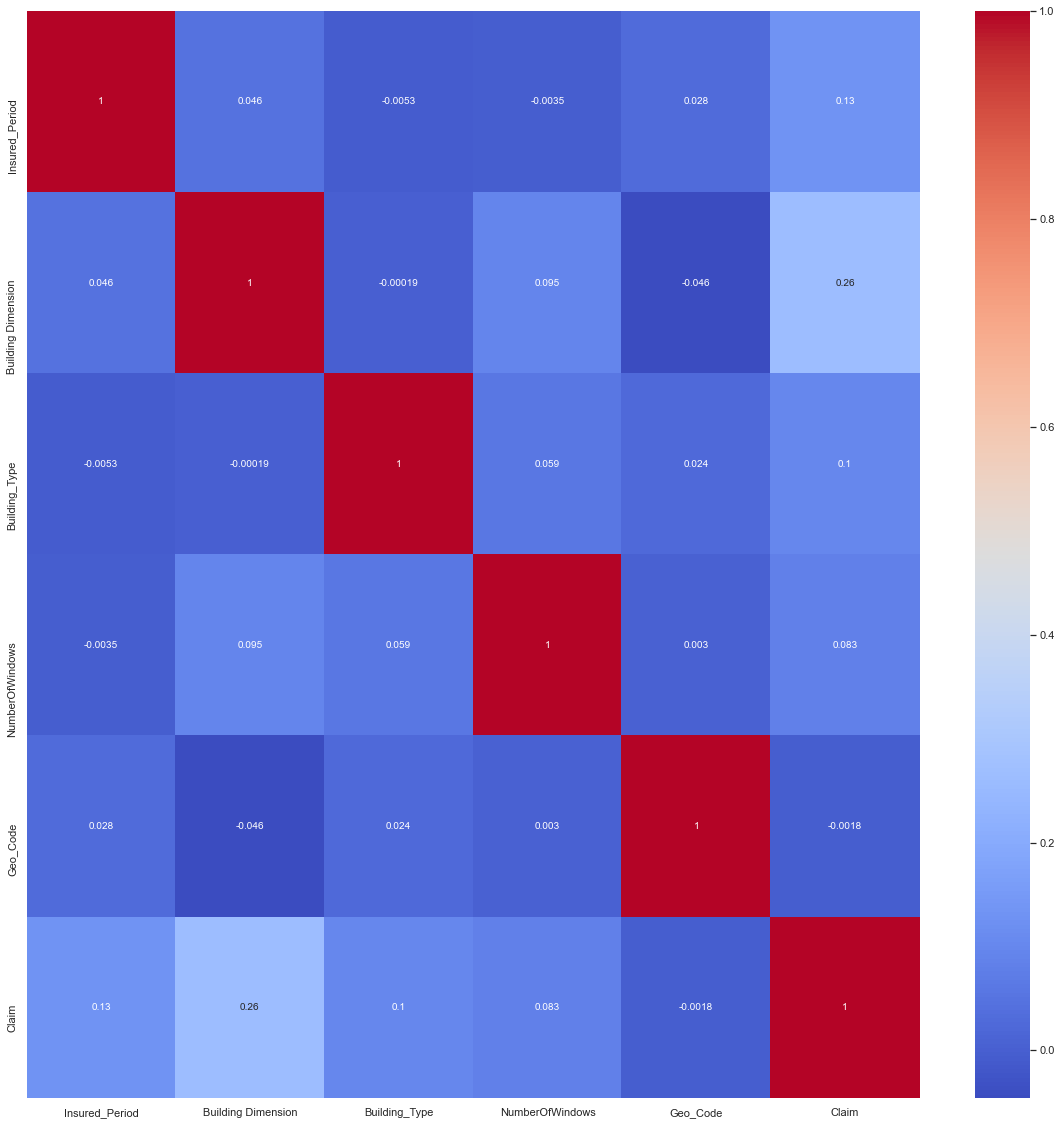

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [55]:
train.corr()['Claim'].sort_values()

Geo_Code             -0.001777
NumberOfWindows       0.083124
Building_Type         0.100648
Insured_Period        0.131450
Building Dimension    0.264246
Claim                 1.000000
Name: Claim, dtype: float64

In [56]:
X = train.drop('Claim', axis=1).copy()
y = train['Claim'].copy()

In [57]:
X = X.reset_index(drop=True)


In [58]:
X.shape, y.shape

((5087, 5), (5087,))

In [59]:
train['Claim'].value_counts()

0    3668
1    1419
Name: Claim, dtype: int64

In [60]:
# import ML libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from rgf.sklearn import RGFClassifier

# Hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

# ensemble
from sklearn.ensemble import VotingClassifier

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [62]:
# RGFClassifier
#RFECV(estimator=RGFClassifier(max_leaf =50, n_jobs=-1, verbose=5, algorithm='RGF_Sib', l2=0.1))

rf = RGFClassifier(max_leaf =50, n_jobs=-1, verbose=5, algorithm='RGF_Sib', l2=0.1)

rf.fit(X_train, y_train)
predx = rf.predict(X_test)
pred = rf.predict_proba(X_test)
pred = [x[1] for x in pred]
print(roc_auc_score(y_test, pred))
print(classification_report(y_test, predx))

n_jobs = -1, but RGFClassifier uses one CPU because classes_ is 2
"train": 
   algorithm=RGF_Sib
   train_x_fn=C:\Users\CHIZUR~1\AppData\Local\Temp\rgf\0ee2ad15-6b16-4682-955c-4ebe4f3ccbcf1.train.data.x
   train_y_fn=C:\Users\CHIZUR~1\AppData\Local\Temp\rgf\0ee2ad15-6b16-4682-955c-4ebe4f3ccbcf1.train.data.y
   Log:ON
   model_fn_prefix=C:\Users\CHIZUR~1\AppData\Local\Temp\rgf\0ee2ad15-6b16-4682-955c-4ebe4f3ccbcf1.model
--------------------
Mon Jan 23 23:49:21 2023: Reading training data ... 
Mon Jan 23 23:49:21 2023: Start ... #train=4069
--------------------
Forest-level: 
   loss=Log
   max_leaf_forest=50
   max_tree=25
   opt_interval=100
   test_interval=100
   num_tree_search=1
   Verbose:ON
   memory_policy=Generous
Turning on Force_to_refresh_all
-------------
Training data: 5x4069, nonzero_ratio=0.9951; managed as dense data.
-------------
Optimization: 
   loss=Log
   num_iteration_opt=5
   reg_L2=0.1
   opt_stepsize=0.5
   max_delta=1
Tree-level: min_pop=10
Node split: reg_L2

In [63]:
# RandomForest

rf = RandomForestClassifier(random_state=42, max_depth=7, class_weight='balanced')
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
pred = rf.predict_proba(X_test)
pred = [x[1] for x in pred]
print(roc_auc_score(y_test, pred))
print(classification_report(y_test, predx))

0.6900113213339986
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       734
           1       0.43      0.50      0.46       284

    accuracy                           0.67      1018
   macro avg       0.61      0.62      0.61      1018
weighted avg       0.69      0.67      0.68      1018



In [64]:
# other Classifier

rf = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
predx = rf.predict(X_test)
pred = rf.predict_proba(X_test)
pred = [x[1] for x in pred]
print(roc_auc_score(y_test, pred))
print(classification_report(y_test, predx))

0.5705688490616725
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       734
           1       0.56      0.12      0.20       284

    accuracy                           0.73      1018
   macro avg       0.65      0.54      0.52      1018
weighted avg       0.69      0.73      0.66      1018



In [65]:
# # other Classifier

# rf = CatBoostClassifier(n_estimators=100, learning_rate=0.02, auto_class_weights='Balanced', random_state=5)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# pred = rf.predict_proba(X_test)
# pred = [x[1] for x in pred]
# print(roc_auc_score(y_test, pred))
# print(classification_report(y_test, predx))

In [66]:
# Kfold based prediction
from sklearn.ensemble import VotingClassifier


def model_score(model):
    rtr = model.predict_proba(X_train)
    rte = model.predict_proba(X_test)
    
    train_auc = roc_auc_score(y_train, [x[1] for x in rtr])
    test_auc = roc_auc_score(y_test, [x[1] for x in rte])
    print('Training data AUC: {} \t Validation AUC: {}'.format(train_auc, test_auc))
    return test_auc


# test is tdata[new]
#sub = pd.read_csv('SampleSubmission.csv')
vr = CatBoostClassifier(n_estimators=100, learning_rate=0.02, auto_class_weights='Balanced', random_state=5, eval_metric='AUC', max_depth=5)
#vr = RGFClassifier(max_leaf = 50, n_jobs=-1, verbose=5, algorithm='RGF_Sib', l2=0.5)
vr.fit(X_train, y_train)
predx = vr.predict(X_test)
pred = vr.predict_proba(X_test)
pred = [x[1] for x in pred]
print(roc_auc_score(y_test, pred))
print(classification_report(y_test, predx))
#vr = RGFClassifier(max_leaf =50, n_jobs=-1, verbose=5, algorithm='RGF_Sib', l2=0.1)
# xg = XGBClassifier(n_estimators=200, objective='binary:logistic', seed=5, random_state=5, n_jobs=-1, max_depth=5)
# lb = LGBMClassifier(n_estimators=200, objective='binary', random_state=5, n_jobs=-1, silent=False, max_depth=5)
# rf = CatBoostClassifier(n_estimators = 200, eval_metric='AUC', random_state=5, thread_count=-1, max_depth=5)

# vr = VotingClassifier(estimators=[('xg', xg), ('lb', lb), ('ct', ct), ('rf', rf)], n_jobs=-1, verbose=True, voting='soft')

kf = StratifiedKFold(n_splits=5, shuffle=False)
scores, preds = [], []
j = 1

#ct = CatBoostClassifier(n_estimators = 100, eval_metric='AUC', random_state=5, thread_count=-1, max_depth=5, use_best_model=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    vr.fit(X_train, y_train)

    print(f'Split trained: {j}')

    score = model_score(vr)
    pred = vr.predict_proba(test)  # prediction of the test data
    pred = [x[1] for x in pred]
    
    scores.append(score)
    preds.append(pred)
    j += 1

print(np.mean(scores))

0:	total: 154ms	remaining: 15.2s
1:	total: 163ms	remaining: 7.99s
2:	total: 171ms	remaining: 5.54s
3:	total: 178ms	remaining: 4.28s
4:	total: 190ms	remaining: 3.6s
5:	total: 198ms	remaining: 3.1s
6:	total: 205ms	remaining: 2.72s
7:	total: 218ms	remaining: 2.5s
8:	total: 222ms	remaining: 2.24s
9:	total: 226ms	remaining: 2.03s
10:	total: 229ms	remaining: 1.85s
11:	total: 231ms	remaining: 1.7s
12:	total: 233ms	remaining: 1.56s
13:	total: 235ms	remaining: 1.44s
14:	total: 237ms	remaining: 1.34s
15:	total: 241ms	remaining: 1.26s
16:	total: 243ms	remaining: 1.18s
17:	total: 244ms	remaining: 1.11s
18:	total: 246ms	remaining: 1.05s
19:	total: 248ms	remaining: 992ms
20:	total: 251ms	remaining: 944ms
21:	total: 253ms	remaining: 898ms
22:	total: 255ms	remaining: 854ms
23:	total: 257ms	remaining: 814ms
24:	total: 259ms	remaining: 777ms
25:	total: 261ms	remaining: 742ms
26:	total: 263ms	remaining: 710ms
27:	total: 264ms	remaining: 680ms
28:	total: 266ms	remaining: 652ms
29:	total: 269ms	remaining: 

66:	total: 183ms	remaining: 90.2ms
67:	total: 185ms	remaining: 87.2ms
68:	total: 187ms	remaining: 84ms
69:	total: 189ms	remaining: 81ms
70:	total: 191ms	remaining: 77.8ms
71:	total: 192ms	remaining: 74.8ms
72:	total: 194ms	remaining: 71.8ms
73:	total: 196ms	remaining: 68.8ms
74:	total: 198ms	remaining: 65.9ms
75:	total: 199ms	remaining: 63ms
76:	total: 201ms	remaining: 60.1ms
77:	total: 204ms	remaining: 57.5ms
78:	total: 206ms	remaining: 54.7ms
79:	total: 208ms	remaining: 51.9ms
80:	total: 210ms	remaining: 49.2ms
81:	total: 211ms	remaining: 46.4ms
82:	total: 213ms	remaining: 43.6ms
83:	total: 216ms	remaining: 41.1ms
84:	total: 220ms	remaining: 38.9ms
85:	total: 222ms	remaining: 36.2ms
86:	total: 224ms	remaining: 33.5ms
87:	total: 226ms	remaining: 30.8ms
88:	total: 231ms	remaining: 28.5ms
89:	total: 234ms	remaining: 26ms
90:	total: 236ms	remaining: 23.3ms
91:	total: 238ms	remaining: 20.7ms
92:	total: 240ms	remaining: 18ms
93:	total: 241ms	remaining: 15.4ms
94:	total: 246ms	remaining: 13

Training data AUC: 0.7104373015932578 	 Validation AUC: 0.6653056126664489
0:	total: 13.5ms	remaining: 1.33s
1:	total: 23.9ms	remaining: 1.17s
2:	total: 34.1ms	remaining: 1.1s
3:	total: 43.3ms	remaining: 1.04s
4:	total: 52ms	remaining: 988ms
5:	total: 59.6ms	remaining: 934ms
6:	total: 67.9ms	remaining: 903ms
7:	total: 75.3ms	remaining: 866ms
8:	total: 83ms	remaining: 839ms
9:	total: 91.2ms	remaining: 821ms
10:	total: 96.3ms	remaining: 779ms
11:	total: 101ms	remaining: 738ms
12:	total: 104ms	remaining: 699ms
13:	total: 107ms	remaining: 658ms
14:	total: 110ms	remaining: 624ms
15:	total: 113ms	remaining: 594ms
16:	total: 116ms	remaining: 564ms
17:	total: 118ms	remaining: 538ms
18:	total: 121ms	remaining: 516ms
19:	total: 123ms	remaining: 493ms
20:	total: 125ms	remaining: 471ms
21:	total: 127ms	remaining: 451ms
22:	total: 129ms	remaining: 433ms
23:	total: 131ms	remaining: 415ms
24:	total: 133ms	remaining: 399ms
25:	total: 135ms	remaining: 384ms
26:	total: 137ms	remaining: 370ms
27:	total: 

In [67]:
submit.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [68]:
# submission


# value = rf.predict_proba(test)

# value = [x[1] for x in value]

predict = np.mean(preds, axis=0)

In [69]:
test2 = pd.read_csv('test_data.csv')


#test2['Claim'] = value
test2['Claim'] = predict


submit = test2[['Customer Id', 'Claim']].copy()

In [70]:
submit.to_csv('Submission10.csv', index=False)

In [71]:
train.shape

(5087, 6)

In [72]:
train.columns

Index(['Insured_Period', 'Building Dimension', 'Building_Type',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [73]:
train[train.duplicated(subset=['Insured_Period'], keep=False)]#.sort_values(by='Customer Id')

,Insured_Period,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.000000,290.0,1,3,1053,0
1,1.000000,490.0,1,3,1053,0
2,1.000000,595.0,1,3,1053,0
3,1.000000,2840.0,1,3,1053,0
5,1.000000,535.0,1,3,1143,0
...,...,...,...,...,...,...
7034,0.997268,2650.0,3,2,-1,1
7043,0.836066,5300.0,3,3,-1,1
7044,1.000000,5300.0,3,3,-1,1
7154,1.000000,-1.0,1,3,-1,1


In [74]:
a = train[train.duplicated(subset=['Insured_Period', 'Building Dimension', 'Building_Type',
       'NumberOfWindows', 'Geo_Code'], keep=False)]

# a = a[['YearOfObservation', 'Insured_Period', 'Residential', 'Geo_Code',
#        'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
#        'NumberOfWindows','Claim']]

#a[a['Insured_Period']==0]

a.head(100)

,Insured_Period,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
17,1.0,3990.0,1,3,1419,0
25,1.0,5439.0,1,3,3190,0
118,1.0,4112.0,4,3,6011,0
127,1.0,2800.0,4,3,6012,0
141,1.0,300.0,4,3,6012,0
142,1.0,550.0,4,3,6012,0
158,1.0,3270.0,4,3,6014,0
204,1.0,4000.0,4,3,6033,0
206,1.0,171.0,4,3,6035,0
226,1.0,3269.0,4,3,6070,0
